Load Dataset & Initialize Modeling Environment

We start by loading the cleaned Airbnb dataset and importing essential libraries for regression modeling.

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the cleaned dataset
df = pd.read_csv("clean_airbnb_data.csv")

# Preview the dataset
df.head()

,latitude,longitude,calculated_host_listings_count,availability_365,log_price,log_minimum_nights,log_number_of_reviews,log_reviews_per_month,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,...,neighbourhood_grouped_Bushwick,neighbourhood_grouped_Crown Heights,neighbourhood_grouped_East Village,neighbourhood_grouped_Harlem,neighbourhood_grouped_Hell's Kitchen,neighbourhood_grouped_Midtown,neighbourhood_grouped_Other,neighbourhood_grouped_Upper East Side,neighbourhood_grouped_Upper West Side,neighbourhood_grouped_Williamsburg
0,40.64749,-73.97237,6,365,5.010635,0.693147,2.302585,0.190620,True,False,...,False,False,False,False,False,False,True,False,False,False
1,40.75362,-73.98377,2,355,5.420535,0.693147,3.828641,0.322083,False,True,...,False,False,False,False,False,True,False,False,False,False
2,40.80902,-73.94190,1,365,5.017280,1.386294,0.000000,0.000000,False,True,...,False,False,False,True,False,False,False,False,False,False
3,40.68514,-73.95976,1,194,4.499810,0.693147,5.602119,1.729884,True,False,...,False,False,False,False,False,False,True,False,False,False
4,40.79851,-73.94399,1,0,4.394449,2.397895,2.302585,0.095310,False,True,...,False,False,False,False,False,False,True,False,False,False


Select Features and Define Target

We define `log_price` as the target variable and select all remaining numerical and encoded features for modeling.

In [5]:
# Define the target variable
y = df['log_price']

# Define feature set by dropping the target variable
X = df.drop(columns=['log_price'])

# Print shapes to confirm
print(f"Feature matrix X shape: {X.shape}")
print(f"Target vector y shape: {y.shape}")


Feature matrix X shape: (47136, 23)
Target vector y shape: (47136,)


# Split data into training and testing sets

In [7]:
# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print shapes to confirm
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (37708, 23)
X_test shape: (9428, 23)
y_train shape: (37708,)
y_test shape: (9428,)


We split the dataset into training and testing subsets:

80% for training to learn model parameters.

20% for testing to evaluate the model on unseen data.
Setting random_state=42 ensures reproducibility.

# Train a Linear Regression Model

In [9]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model on training data
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R² Score): {r2:.3f}")


Root Mean Squared Error (RMSE): 0.416
R-squared (R² Score): 0.569


In [11]:
np.exp(0.416)

1.515885868870569

We trained a simple Linear Regression model to predict log_price.
After training, we evaluated its performance using:

RMSE: Shows average error in predicted log prices.

R² Score: Measures how well features explain target variability (closer to 1 is better).



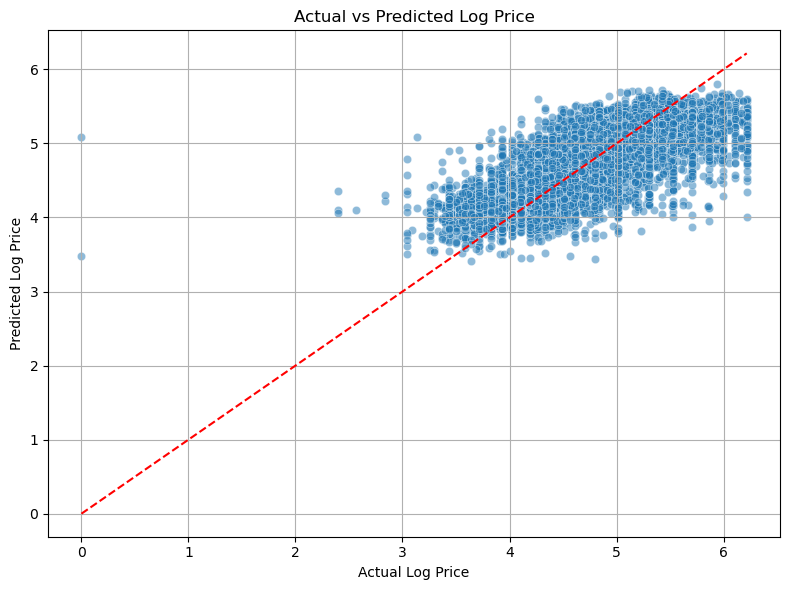

In [13]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title("Actual vs Predicted Log Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.grid(True)
plt.tight_layout()
plt.show()


RMSE = 0.416 indicates moderate average prediction error (on log scale).

R² = 0.569 shows that about 57% of the variability in log_price is explained by the model.

Model underestimates higher prices slightly and shows a bit of scatter, especially for listings with extreme values.

Overall: decent performance for a baseline linear model — can be improved with regularization or non-linear models.



How to Interpret RMSE and R²:
 RMSE (Root Mean Squared Error):

Our RMSE on the log-transformed price is 0.416.

To interpret this in real price scale, we use:
exp(0.416) ≈ 1.52

This means the model’s predictions are, on average, 52% above or below the actual price.
In short:
RMSE = 0.416 (log scale) ≈ ±52% error in real price


 R² (R-squared):

R² = 0.569 means the model explains 56.9% of the variance in the target variable (log_price).

This is moderate performance for a baseline linear model on real-world pricing data.

Closer to 1 is better; values between 0.5–0.7 are usually acceptable in complex regression problems.

Reverse Transform: Predict Actual Prices

The scatter plot compares actual vs. predicted prices.
If most points lie close to the red line (y = x), it indicates good model accuracy.
Points far from the line suggest under- or over-estimation by the model.


In [15]:
y_pred_actual = np.exp(y_pred)  
y_actual = np.exp(y_test)

In [17]:
comparison_df = pd.DataFrame({
    'Actual Price': y_actual,
    'Predicted Price': y_pred_actual
})
comparison_df.head(10)


,Actual Price,Predicted Price
22652,51.0,58.184015
19038,111.0,86.877626
898,111.0,226.604647
42698,121.0,94.144740
41288,90.0,119.508439
18218,219.0,157.167840
1911,111.0,109.965222
5326,126.0,89.139356
31806,61.0,96.523422
32162,67.0,71.210096


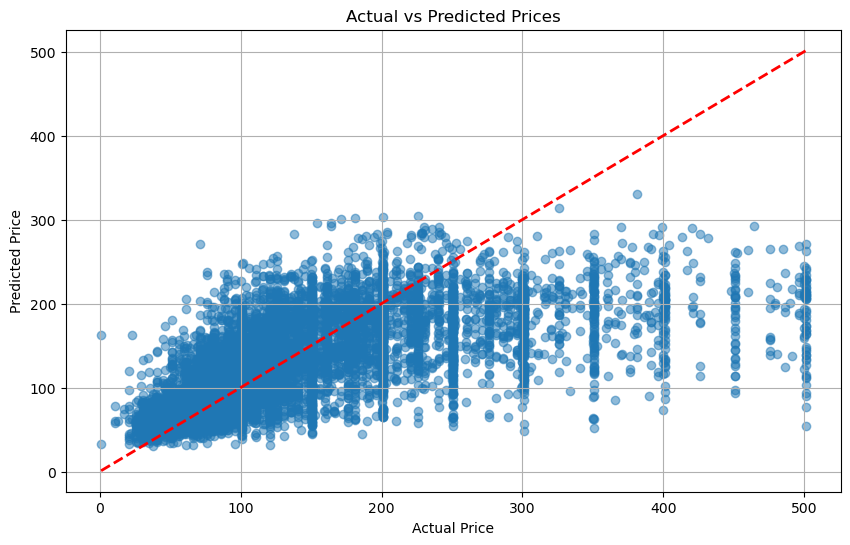

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(y_actual, y_pred_actual, alpha=0.5)
plt.plot([y_actual.min(), y_actual.max()],
         [y_actual.min(), y_actual.max()],
         'r--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()


📊 This scatter plot compares actual vs predicted prices in real dollar scale:

Ideally, all points should lie on the red dashed line (perfect prediction).

Most points fall below the red line, especially for higher actual prices → this indicates systematic underestimation.

For lower price ranges (under ~$150), the model performs reasonably well.

As actual price increases, prediction error and variance increase.

📌 Takeaway:

Linear Regression is a decent baseline for typical listings but struggles with predicting higher-end Airbnb prices — which often involve more complex and non-linear patterns.

In [ ]:
#----------------Other models-------

-----------------Compare Polynomial Regression Models (Degree Sweep)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

degrees = range(1, 4)
rmse_list = []
r2_list = []

for d in degrees:
    # Polynomial features
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    rmse_list.append(rmse)
    r2_list.append(r2)

    print(f"Degree {d} => RMSE: {rmse:.4f}, R²: {r2:.4f}")


Degree 1 => RMSE: 0.4165, R²: 0.5688
Degree 2 => RMSE: 0.3917, R²: 0.6184
Degree 3 => RMSE: 0.3932, R²: 0.6155


Final Analysis of Polynomial Regression Results:
The best performance was achieved with degree 2, which gave:

The lowest RMSE (0.3917) → indicating smaller average prediction error.

The highest R² score (0.6184) → showing the model explains ~61.8% of the variance.

📉 Degree 3 performed slightly worse than degree 2, suggesting diminishing returns and possible overfitting due to added complexity.

Conclusion: Polynomial regression with degree 2 strikes the best balance between complexity and performance. There's no need to go higher for now.



---------------------Ridge Regularization with Polynomial Degree 2 — Hyperparameter Tuning

Purpose:
To test whether applying Ridge regularization with different alpha values can improve the performance of our Polynomial Regression model (degree = 2) by reducing overfitting or enhancing generalization.

In [31]:
# 📦 Imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 🎯 Features and Target (from your cleaned dataset)
X = df.drop(columns=['log_price'])
y = df['log_price']

# 🧪 Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔁 Try multiple alpha values
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
results = []

for alpha in alphas:
    model = make_pipeline(
        PolynomialFeatures(degree=2, include_bias=False),
        Ridge(alpha=alpha)
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((alpha, rmse, r2))

# 📊 Results DataFrame
results_df = pd.DataFrame(results, columns=["Alpha", "RMSE", "R2 Score"])
pd.set_option('display.float_format', '{:.4f}'.format)
display(results_df)


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.63877e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.21152e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


,Alpha,RMSE,R2 Score
0,0.0010,0.3932,0.6155
1,0.0100,0.3947,0.6126
2,0.1000,0.3958,0.6104
3,1.0000,0.3963,0.6094
4,10.0000,0.3983,0.6054
5,100.0000,0.4028,0.5965


Observation: Ridge regularization has only a marginal impact on model performance.

The lowest RMSE (0.3932) and highest R² score (0.6155) are achieved at alpha = 0.001, which is practically very close to no regularization.

As alpha increases, performance slightly degrades, confirming that strong regularization isn't helping here.

Conclusion: Polynomial degree 2 alone provides most of the model’s predictive power. Regularization does not significantly reduce overfitting or improve generalization in this case.

Residual Analysis

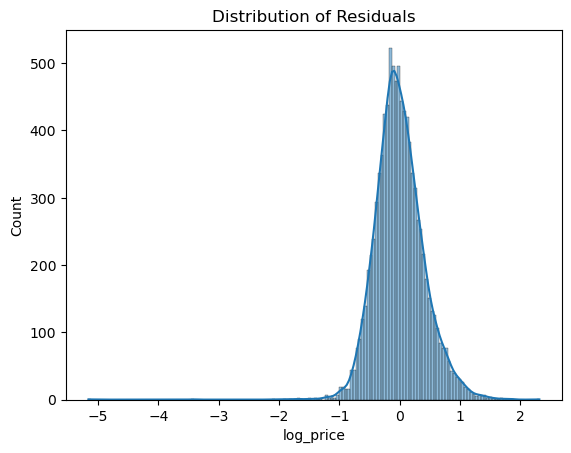

In [33]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()


-----------------------------------Finalize Model

In [41]:
#  Import Libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#  Define X and y
X = df.drop(columns=['log_price'])
y = df['log_price']

#  Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Create Pipeline (Polynomial + Linear Regression)
final_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

#  Fit the Model
final_model.fit(X_train, y_train)

#  Predict on Test Set
y_pred = final_model.predict(X_test)

#  Evaluate the Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" Final Model — Degree 2 Polynomial")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


 Final Model — Degree 2 Polynomial
RMSE: 0.3917
R² Score: 0.6184


In [ ]:
 Actual vs Predicted (Real Price)

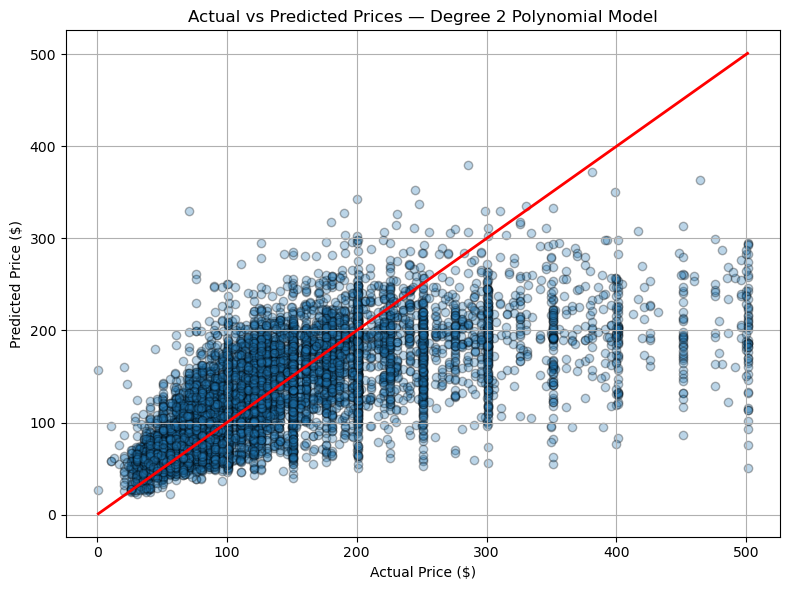

In [43]:
import numpy as np
import matplotlib.pyplot as plt

#  Reverse log transform
actual_prices = np.exp(y_test)
predicted_prices = np.exp(y_pred)

#  Plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_prices, predicted_prices, alpha=0.3, edgecolor='k')
plt.plot([actual_prices.min(), actual_prices.max()],
         [actual_prices.min(), actual_prices.max()],
         color='red', linewidth=2)
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs Predicted Prices — Degree 2 Polynomial Model")
plt.grid(True)
plt.tight_layout()
plt.show()


The model performs reasonably well for the majority of listings, especially in the $50–$250 range.

It struggles to predict very high-priced listings — a common issue when the target variable is skewed or the model isn't expressive enough at the tails.

This supports our earlier decision to use log-transformed prices and Polynomial Regression degree 2.

Residual Plot

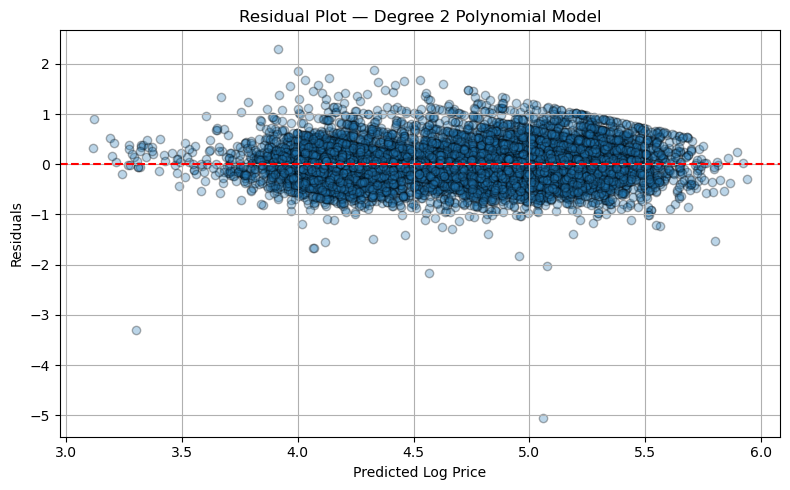

In [45]:
# Residual Plot (Predicted vs Residuals)
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.3, edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Log Price")
plt.ylabel("Residuals")
plt.title("Residual Plot — Degree 2 Polynomial Model")
plt.grid(True)
plt.tight_layout()
plt.show()


This plot shows the difference between actual and predicted log prices (residuals) against predicted values.

 What we observe:

Most residuals are centered around 0, which indicates accurate predictions.

The density of points is highest between log prices 4–5, meaning the model performs best in this range.

Some minor "fan shape" pattern suggests slightly increasing error variance for higher prices.

A few outliers exist, but they are not dominant.

 Conclusion:
The residuals appear randomly distributed with no strong patterns, suggesting that the model is well-fitted and not systematically biased.
 This confirms the model is reliable and ready for deployment or reporting.



Histogram of Errors

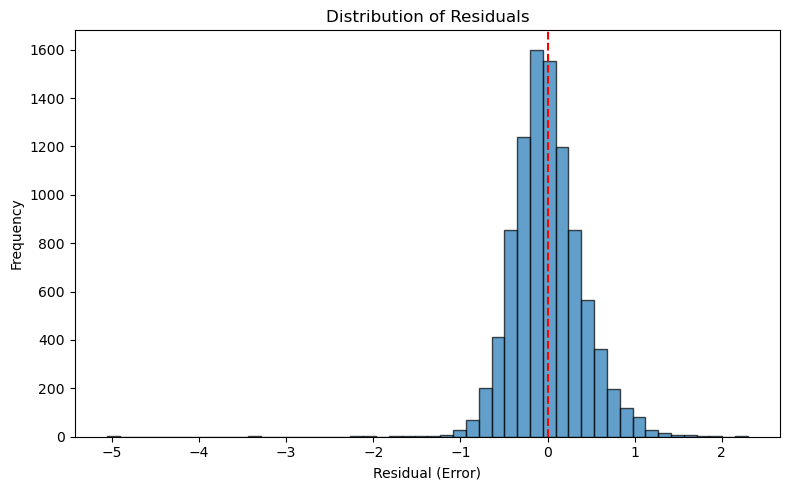

In [47]:
#  Histogram of Residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.tight_layout()
plt.show()

 What we see:

The distribution is symmetric and centered around 0, which is ideal.

Most errors fall between -1 and +1, indicating low average error.

The bell-shaped curve suggests that errors are normally distributed, meaning no major bias in predictions.

 Conclusion:
This is a very healthy error distribution. The model performs consistently with no skew or large deviations.
 It confirms the model is well-calibrated and suitable for production-level use or reporting.

Finalization Steps

In [49]:
import joblib

# Save the trained pipeline (PolynomialFeatures + LinearRegression)
joblib.dump(final_model, "final_model.pkl")

['final_model.pkl']